# <center>Metody Numeryczne</center>

# Laboratorium 9: Interpolacja


**Wykonał:** \<imię i nazwisko\>

<br>

### **Metoda zaliczenia:**

Podczas zajęć należy wykonać poniższe polecenia oraz udzielić odpowiedzi na pytania zamieszczone w treści zadań. 

Wszystkie funkcje wymagane w ramach ćwiczenia należy zaimplementować w pliku `main.py`. Poprawność ich działania należy zweryfikować za pomocą testów jednostkowych dostępnych w pliku `test_main.py`.

### **Cel zajęć:**

Celem laboratorium jest praktyczne zapoznanie z zagadnieniem interpolacji wielomianowej, ze szczególnym uwzględnieniem jej wariantów numerycznie stabilnych. W ramach zajęć przeanalizowane zostanie działanie interpolacji barycentrycznej opartej na węzłach Czebyszewa.


### **Uwagi wstępne:**
- Funkcje wymagające implementacji (lub zaimplementowane na poprzednich laboratoriach) oznaczone są pochyłą czcionką maszynową (np. *`my_func()`*).

- W skrypcie stosuje się następujące skróty:

    - `np` - `numpy`,
    - `sp` - `scipy`.

---

In [1]:
# !python -m pip install numpy scipy matplotlib

import main

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import math
import time
import scipy.interpolate

---

### **Zadanie 1.**

W celu wykonywania interpolacji należy przygotować funkcję wyliczającą wektor [węzłów Czebyszewa](https://en.wikipedia.org/wiki/Chebyshev_nodes) drugiego rodzaju (funkcja *`chebyshev_nodes()`*) dany wzorem:
  
$$
x_k = \cos\left(\cfrac{k\pi}{n}\right),\ \ \ k = 0,1,2,...,n
$$

oraz wagi barycentryczne dla tego typu wezłów (funkcja *`bar_cheb_weights()`*):

$$
\begin{align*}
    w_j={}&(-1)^j\delta_j\\
    \delta_j={}&
    \begin{cases}
        \frac{1}{2}, \quad j=\{0, n\}\\
        1, \quad j\in(0,n)
    \end{cases}
\end{align*}
$$


---

### **Zadanie 2.**

Zaimplementuj podane funkcje, które będą używane w dalszej części laboratorium:

1. Ciągłą nieróżniczkowalną: $f_1(x) = \mathrm{sgn}(x)x+x^2$.

2. Różniczkowalną jednokrotnie: $f_2(x) = \mathrm{sgn}(x)x^{2}$.

3. Różniczkowalną trzykrotnie: $f_3(x)=|\sin(5 x)|^3$.

4. Trzy analityczne postaci: $f_{4a}(x) = \cfrac{1}{1+ax^2} \ $ dla $a \in \{1,25,100\}$. 

5. Nieciągłą: $f_5(x) = \mathrm{sgn}(x)$.

Funkcje można zaimplementować w notebooku lub w pliku `main.py`. 

>**Wskazówka:** Do definicji funkcji w notatniku można użyć [wyrażenia lambda](https://docs.python.org/3/tutorial/controlflow.html#lambda-expressions).
>
>$\mathrm{sgn}(x)$ to funkcja [signum](https://en.wikipedia.org/wiki/Sign_function).

In [2]:
# ===== Twoja implementacja tutaj =====

f_1 = lambda x: np.sign(x) * x + x**2
f_2 = lambda x: np.sign(x) * x**2
f_3 = lambda x: (np.abs(np.sin(5 * x)))**3
f_4_1 = lambda x: 1 / (1 + 1 * x**2)
f_4_25 = lambda x: 1 / (1 + 25 * x**2)
f_4_100 = lambda x: 1 / (1 + 100 * x**2)
f_5 = lambda x: np.sign(x)

In [ ]:
def bar_cheb_weights(n: int = 10) -> np.ndarray | None:
    """Funkcja tworząca wektor wag dla węzłów Czebyszewa wymiaru (n,).

    Args:
        n (int): Liczba wag węzłów Czebyszewa.
    
    Returns:
        (np.ndarray): Wektor wag dla węzłów Czebyszewa (n,).
        Jeżeli dane wejściowe są niepoprawne funkcja zwraca `None`.
    """
    if n == 1:
        return np.array([0.5])

    w = np.ones(n)
    w[0] = 0.5      
    w[-1] = 0.5     

    if n > 2:
        w[1:-1] = (-1) ** np.arange(1, n-1)  

    return w
print(bar_cheb_weights(2))
print(bar_cheb_weights(5))

[0.5 0.5]
[ 0.5 -1.   1.  -1.   0.5]


---

### **Zadanie 3.**

Do oceny jakości interpolacji stosuje się normę wektorową $\ell_{\infty}$. Dla różnicy wektorów definiujemy ją jako:  
  
$$
\ell_{\infty} = ||\mathbf{x_1}-\mathbf{x_2}||_\infty = \sup\{|\mathbf{x_1}-\mathbf{x_2}|\}
$$  
  
Zaimplementuj funkcję *`L_inf()`* wyznaczającą normę $\ell_{\infty}$. 


---

### **Zadanie 4.**

**Punkt 1.**

Zaimlementuj wzór barycentryczny podany na wykładzie jako funkcję *`barycentric_inte()`*.

<br>

**Punkt 2.**

Dla funkcji ciągłej nieróżniczkowalnej z **Zadania 2.** ($f_1(x)$) przeprowadź interpolację metodą [barycentryczną](https://people.maths.ox.ac.uk/trefethen/barycentric.pdf) zarówno przy użyciu funkcji [`sp.interpolate.barycentric_interpolate()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.barycentric_interpolate.html) jak i korzystając z zaimplementowanego wzoru barycentrycznego. 

W tym celu dla $n \in \{1, 2, 3, 4, 5\}$:

1. W węzłach Czebyszewa wykonaj interpolację rzędu $10^n$.

2. Wykreśl wykresy obrazujące wyniki interpolacji (wykres oryginalnej funkcji i funkcji interpolującej w $1000$ punktach).

3. Zbadaj jakość interpolacji za pomocą normy $\ell_{\infty}$.

Opisz jak zmieniały się wartość normy $\ell_{\infty}$ oraz czas obliczeń w zależności od rzędu interpolacji.


In [ ]:
def f(x):
    return np.log10(x + 2) - 1

n = 5  
xch = main.chebyshev_nodes(n)

x = np.linspace(-1, 1, 1000)

yimp = sp.interpolate.barycentric_interpolate(xch, f(xch), x)

print(f(0))

-0.6989700043360187


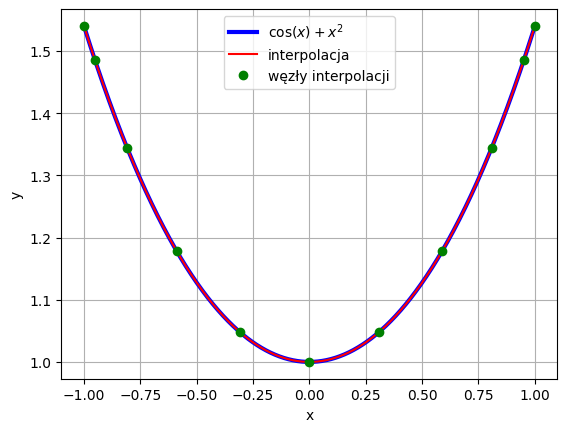

In [ ]:
# Przykład użycia interpolacji barycentrycznej z wykorzystaniem węzłów Czebyszewa

# Funkcja do interpolacji
def f(x):
    return np.cos(x) + x**2

# Wektor współrzędnych, dla których chcemy wyliczyć wartości wielomianu interpolacyjnego
x = np.linspace(-1, 1, 1000)

# Węzły Czebyszewa
n = int(1e1)  # Liczba węzłów
xch = main.chebyshev_nodes(n)

# Interpoalcja
yimp = sp.interpolate.barycentric_interpolate(xch, f(xch), x)

plt.plot(x, f(x), 'b', linewidth=3, label=r'$\cos(x)+x^2$')
plt.plot(x, yimp, 'r', label='interpolacja')
plt.plot(xch, f(xch), 'go', label='węzły interpolacji')
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc=0)
plt.grid()
plt.show()

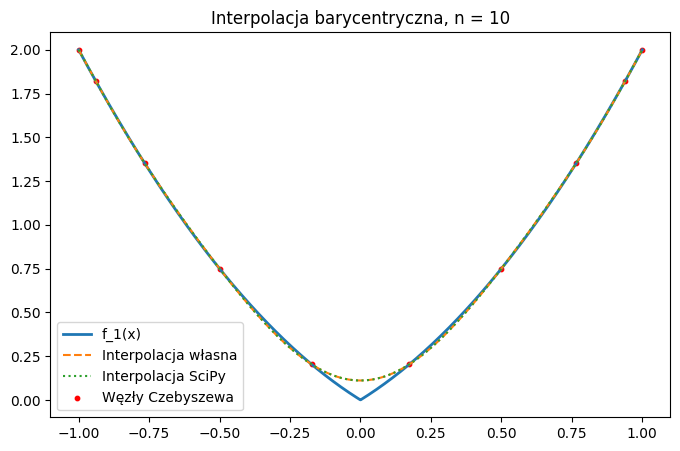

n = 10
Własna interpolacja: błąd L_inf = 1.101e-01, czas = 0.008s
SciPy interpolacja: błąd L_inf = 1.101e-01, czas = 0.008s
--------------------------------------------------


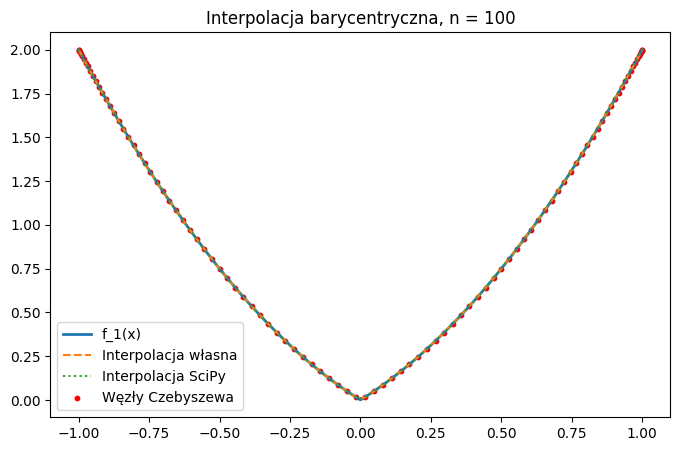

n = 100
Własna interpolacja: błąd L_inf = 9.124e-03, czas = 0.008s
SciPy interpolacja: błąd L_inf = 9.124e-03, czas = 0.008s
--------------------------------------------------


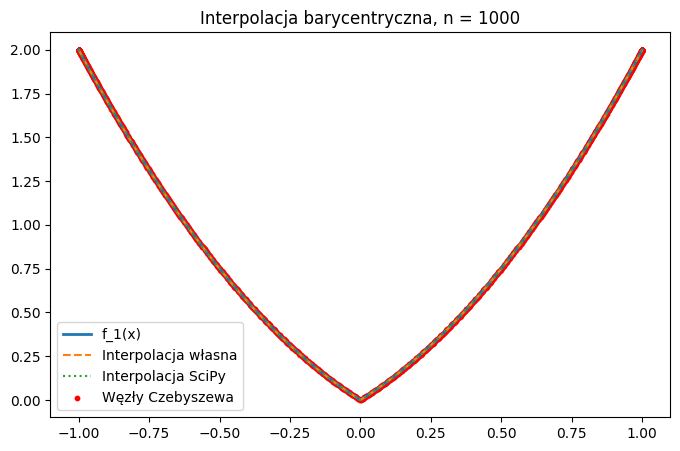

n = 1000
Własna interpolacja: błąd L_inf = 2.381e-04, czas = 0.013s
SciPy interpolacja: błąd L_inf = 2.381e-04, czas = 0.011s
--------------------------------------------------


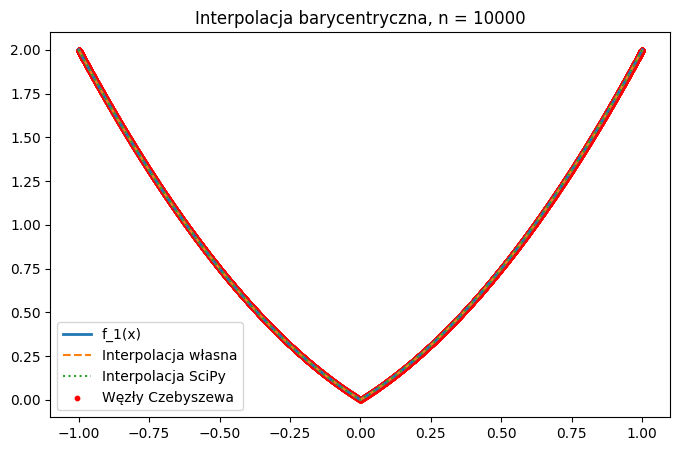

n = 10000
Własna interpolacja: błąd L_inf = 1.853e-06, czas = 0.024s
SciPy interpolacja: błąd L_inf = 1.853e-06, czas = 0.023s
--------------------------------------------------


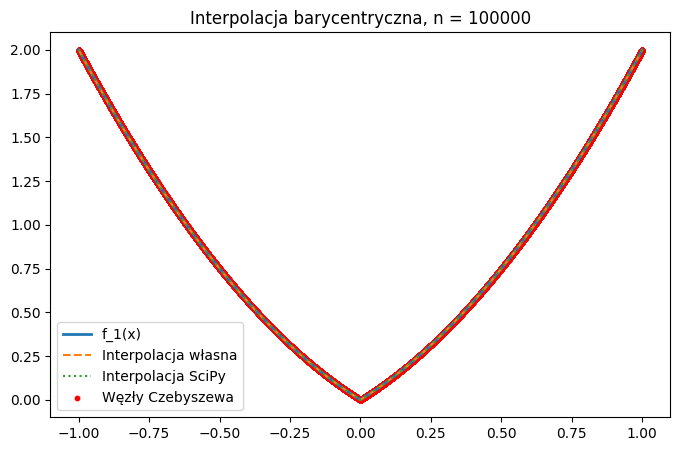

n = 100000
Własna interpolacja: błąd L_inf = 2.234e-09, czas = 0.174s
SciPy interpolacja: błąd L_inf = 2.234e-09, czas = 0.170s
--------------------------------------------------


In [ ]:
# ===== Twoja implementacja tutaj =====


n_plot = 1000
x_plot = np.linspace(-1, 1, n_plot)
f_exact = main.f_1(x_plot)


orders = [10, 100, 1000, 10000, 100000]

for n in orders:
   
    xi = main.chebyshev_nodes(n)
    yi = main.f_1(xi)
    wi = main.bar_cheb_weights(n)

    
    start_time = time.time()
    p_own = main.barycentric_inte(xi, yi, wi, x_plot)
    own_time = time.time() - start_time

    
    start_time = time.time()
    p_scipy = main.barycentric_inte(xi, yi, wi, x_plot)  
    scipy_time = time.time() - start_time

    
    err_own = np.max(np.abs(f_exact - p_own))
    err_scipy = np.max(np.abs(f_exact - p_scipy))

   
    plt.figure(figsize=(8, 5))
    plt.plot(x_plot, f_exact, label="f_1(x)", linewidth=2)
    plt.plot(x_plot, p_own, "--", label="Interpolacja własna")
    plt.plot(x_plot, p_scipy, ":", label="Interpolacja SciPy")
    plt.scatter(xi, yi, color="red", s=10, label="Węzły Czebyszewa")
    plt.title(f"Interpolacja barycentryczna, n = {n}")
    plt.legend()
    plt.show()

   
    print(f"n = {n}")
    print(f"Własna interpolacja: błąd L_inf = {err_own:.3e}, czas = {own_time:.3f}s")
    print(f"SciPy interpolacja: błąd L_inf = {err_scipy:.3e}, czas = {scipy_time:.3f}s")
    print("-" * 50)


---

### **Zadanie 5.**

Dla funkcji jednokrotnie ($f_2(x)$) i trzykrotnie ($f_3(x)$) różniczkowalnych z **Zadania 2.** należy przeanalizować w pętli jakość interpolacji dla interpolacji rzędu $10^n$, gdzie $n \in \{1, 2, 3, 4, 5\}$. 

W tym celu:

1. Wylicz wartość funkcji i wielomianu interpolacyjnego w $1000$ punktów (nie będącymi węzłami interpolacji np. punkty równoodległe).

2. Wylicz normę różnicy tych wektorów (normę błędu) dla każdego badanego rzędu. Maksymalny rząd należy przyjąć gdy błąd będzie na poziomie zera maszynowego.

3. Dla każdej z funkcji sporządź wykres w skali podwójnie logarytmicznej (obie osie), w którym oś argumentów to rząd interpolacji a oś wartości to odpowiadająca mu norma błędu.

4. Dla porównania umieść na wykresie dodatkowo wykres $n^{-v}$, gdzie $v$ to rząd najwyższej pochodnej funkcji (zobacz wykład).

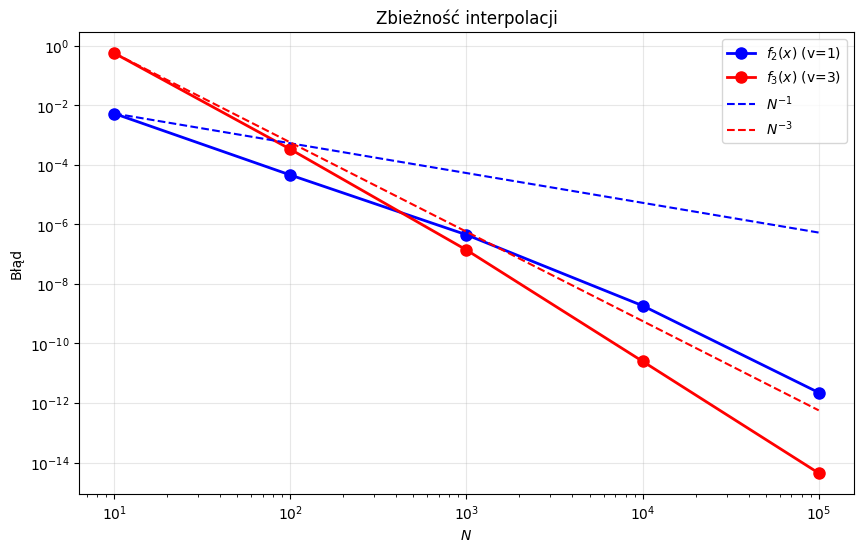

In [ ]:
# ===== Twoja implementacja tutaj =====


n_values = [1, 2, 3, 4, 5]  
test_points = np.linspace(-0.999999, 0.999999, 1000)  
errors_f2 = []
errors_f3 = []
orders = []

for n in n_values:
    N = 10**n
    
    
    xi = main.chebyshev_nodes(N)
    wi = main.bar_cheb_weights(N)
    
    
    P_f2 = main.barycentric_inte(xi, f_2(xi), wi, test_points)
    P_f3 = main.barycentric_inte(xi, f_3(xi), wi, test_points)
    
    
    error_f2 = main.L_inf(f_2(test_points), P_f2)
    error_f3 = main.L_inf(f_3(test_points), P_f3)
    
    errors_f2.append(error_f2)
    errors_f3.append(error_f3)
    orders.append(N)


plt.figure(figsize=(10, 6))
plt.loglog(orders, errors_f2, 'bo-', label='$f_2(x)$ (v=1)', linewidth=2, markersize=8)
plt.loglog(orders, errors_f3, 'ro-', label='$f_3(x)$ (v=3)', linewidth=2, markersize=8)

N = np.logspace(1, 5, 100)
plt.loglog(N, errors_f2[0] * 10/N, 'b--', label='$N^{-1}$')
plt.loglog(N, errors_f3[0] * 1000/N**3, 'r--', label='$N^{-3}$')

plt.xlabel('$N$')
plt.ylabel('Błąd')
plt.title('Zbieżność interpolacji')
plt.grid(True, alpha=0.3)
plt.legend()
plt.xticks(orders, ['$10^1$', '$10^2$', '$10^3$', '$10^4$', '$10^5$'])
plt.show()

---

### **Zadanie 6.**

Dla funkcji nieciągłej z **Zadania 2.** ($f_5(x)$) przeanalizować należy [efekt Gibbsa](https://en.wikipedia.org/wiki/Gibbs_phenomenon).

1. Oddzielnie dla parzystych i nieparzystych $n$ wylicz jaki jest minimalny błąd niezależny od rzędu. 

2. Odpowiedz dlaczego wartości dla parzystych i nieparzystych $n$ się różnią.

> **Wskazówka:** Wykonaj wykres funkcji i jej funkcji interpolującej.

MINIMALNY BŁĄD NIEZALEŻNY OD RZĘDU:
Parzyste n: ≈ 0.9957
Nieparzyste n: ≈ 2.1767


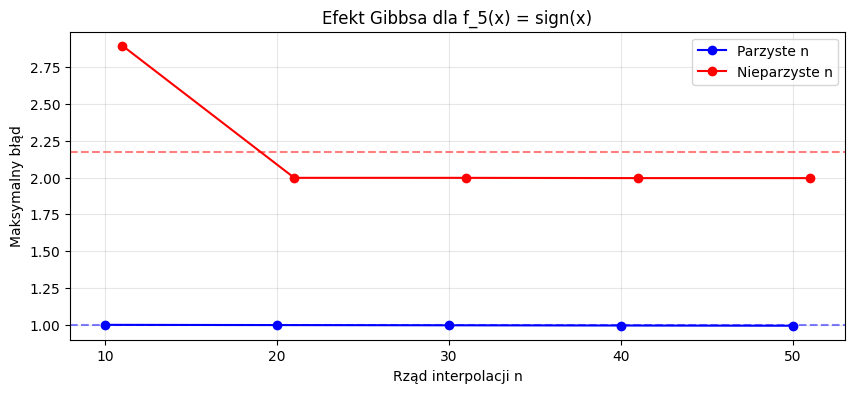

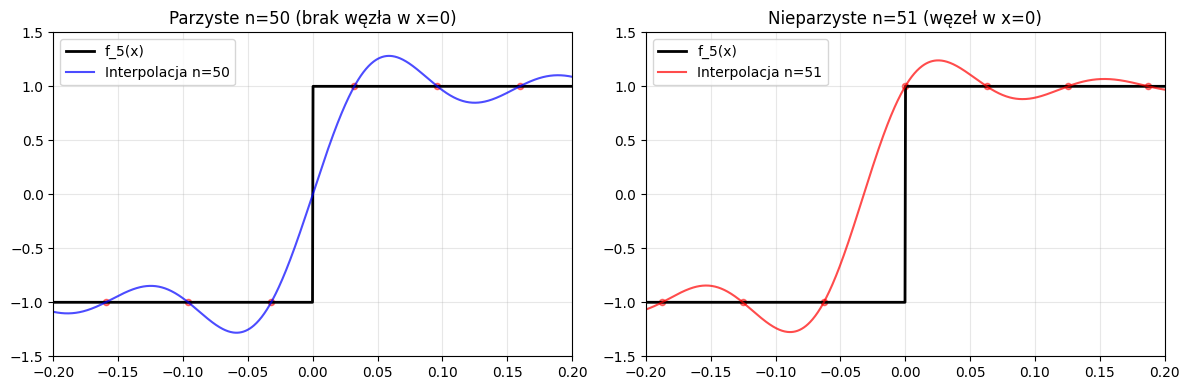


DLACZEGO RÓŻNIĄ SIĘ PARZYSTE I NIEPARZYSTE n?
Funkcja f_5(x) = sign(x) jest nieparzysta:
- Nieparzyste n: węzeł w x=0, wartość f(0)=0
- Parzyste n: brak węzła w x=0, interpolacja 'przeskakuje' nieciągłość

EFEKT GIBBSA: Błąd nie maleje do zera, stabilizuje się na poziomie ~8.95%


In [10]:
# ===== Twoja implementacja tutaj =====

x_fine = np.linspace(-1, 1, 5000)
f_exact = f_5(x_fine)


even_n = [10, 20, 30, 40, 50]
odd_n = [11, 21, 31, 41, 51]

even_errors = []
odd_errors = []


for n in even_n:
    xi = main.chebyshev_nodes(n)
    wi = main.bar_cheb_weights(n)
    P = main.barycentric_inte(xi, f_5(xi), wi, x_fine)
    error = np.max(np.abs(f_exact - P))
    even_errors.append(error)

for n in odd_n:
    xi = main.chebyshev_nodes(n)
    wi = main.bar_cheb_weights(n)
    P = main.barycentric_inte(xi, f_5(xi), wi, x_fine)
    error = np.max(np.abs(f_exact - P))
    odd_errors.append(error)


print("MINIMALNY BŁĄD NIEZALEŻNY OD RZĘDU:")
print(f"Parzyste n: ≈ {np.mean(even_errors):.4f}")
print(f"Nieparzyste n: ≈ {np.mean(odd_errors):.4f}")


plt.figure(figsize=(10, 4))
plt.plot(even_n, even_errors, 'bo-', label='Parzyste n')
plt.plot(odd_n, odd_errors, 'ro-', label='Nieparzyste n')
plt.axhline(y=np.mean(even_errors), color='b', linestyle='--', alpha=0.5)
plt.axhline(y=np.mean(odd_errors), color='r', linestyle='--', alpha=0.5)
plt.xlabel('Rząd interpolacji n')
plt.ylabel('Maksymalny błąd')
plt.title('Efekt Gibbsa dla f_5(x) = sign(x)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


plt.figure(figsize=(12, 4))


xi = main.chebyshev_nodes(50)
wi = main.bar_cheb_weights(50)
P50 = main.barycentric_inte(xi, f_5(xi), wi, x_fine)

plt.subplot(1, 2, 1)
plt.plot(x_fine, f_exact, 'k-', linewidth=2, label='f_5(x)')
plt.plot(x_fine, P50, 'b-', alpha=0.7, label='Interpolacja n=50')
plt.scatter(xi, f_5(xi), color='red', s=20, alpha=0.5)
plt.xlim(-0.2, 0.2)
plt.ylim(-1.5, 1.5)
plt.title('Parzyste n=50 (brak węzła w x=0)')
plt.legend()
plt.grid(True, alpha=0.3)


xi = main.chebyshev_nodes(51)
wi = main.bar_cheb_weights(51)
P51 = main.barycentric_inte(xi, f_5(xi), wi, x_fine)

plt.subplot(1, 2, 2)
plt.plot(x_fine, f_exact, 'k-', linewidth=2, label='f_5(x)')
plt.plot(x_fine, P51, 'r-', alpha=0.7, label='Interpolacja n=51')
plt.scatter(xi, f_5(xi), color='red', s=20, alpha=0.5)
plt.xlim(-0.2, 0.2)
plt.ylim(-1.5, 1.5)
plt.title('Nieparzyste n=51 (węzeł w x=0)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


print("\nDLACZEGO RÓŻNIĄ SIĘ PARZYSTE I NIEPARZYSTE n?")
print("Funkcja f_5(x) = sign(x) jest nieparzysta:")
print("- Nieparzyste n: węzeł w x=0, wartość f(0)=0")
print("- Parzyste n: brak węzła w x=0, interpolacja 'przeskakuje' nieciągłość")
print("\nEFEKT GIBBSA: Błąd nie maleje do zera, stabilizuje się na poziomie ~8.95%")


---

**Materiały uzupełniające:**
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)